<a href="https://colab.research.google.com/github/Laura-Neff/BaselineRegressionModel/blob/main/BaselineRegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
automobile_df = pd.read_csv('cars_processed.csv')

automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.000000,8,307.0,130,3504,12.0,US,49
1,16.000000,8,304.0,150,3433,12.0,US,49
2,17.000000,8,302.0,140,3449,10.5,US,49
3,14.000000,8,454.0,220,4354,9.0,US,49
4,23.551429,8,440.0,215,4312,8.5,US,49


In [12]:
automobile_df.shape

(387, 8)

In [13]:
X = automobile_df[['Age']] #X = the Age column
Y = automobile_df['MPG'] #Y = the MPG column

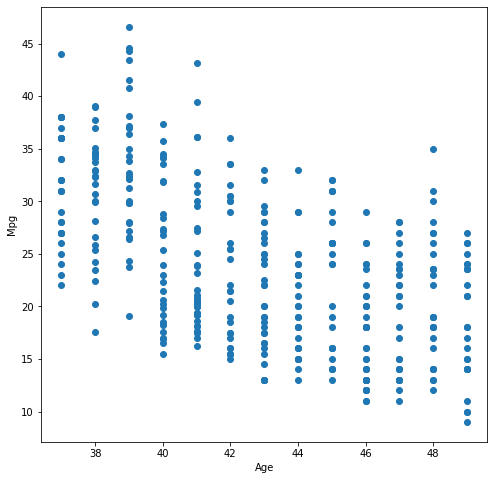

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))

plt.scatter(automobile_df['Age'], automobile_df['MPG']) #plot Age vs. MPG as a scatter plot to see relationship between Age and MPG

plt.xlabel('Age')
plt.ylabel('Mpg')

plt.show()

#Good candidate for our linear regression because we see a strongly correlated relationship; as cars get older, ther MPG seems to get worse/less

In [15]:
from sklearn.model_selection import train_test_split #split our data into test and train data (train data to teach model, test to evaluate model)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) #test size = 20% of data

In [16]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True).fit(x_train, y_train) #train model using LinearRegression and use training data
#normalize = True means our X features will be normalized before regression is performed
#normalization = substracting the mean and dividing every feature by the L to norm
#This will serve to center all of X features around a mean of 0
#Centering your data around a mean of 0 makes it easier for ML models to work with your data 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [18]:
print('Training score: ', linear_model.score(x_train, y_train)) #Gives us r^2 score of regression analysis
#R^2 is a measure of how well our regression model fit our underlying data
#expressed as a fraction between 0 and 1 or as a percentage

#this code measures how much variance in the underlying data was captured by our regression model

#Our model does not have a great score as you can see

Training score:  0.30503259070201894


In [19]:
y_pred = linear_model.predict(x_test)

In [21]:
from sklearn.metrics import r2_score 

print('Testing score: ', r2_score(y_test, y_pred)) #print r2 score to test how well our linear model performed in test
#Underfit on training data

Testing score:  0.36648871674719485


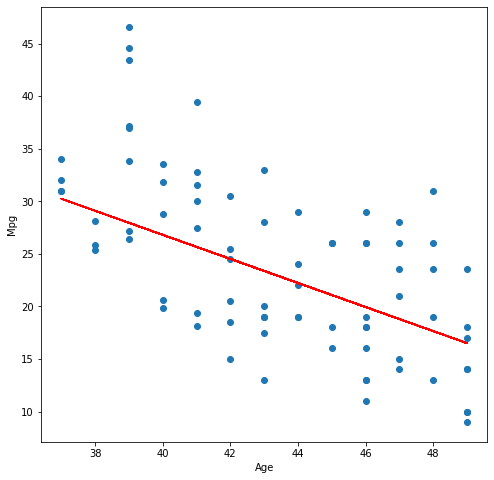

In [22]:
fig, ax = plt.subplots(figsize=(8, 8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Age')
plt.ylabel('Mpg')
plt.show() #plot x test data vs. y test data as scatter plot and then a line of x test data vs. y pred 
           #line of x test data vs. y pred shows us how the machine learning algorithm generalizes new data points
           #Does it accurately capture the relationship between x and y? 

           #You can see the fit is not great because there's many data points far away from the line

In [23]:
X = automobile_df[['Horsepower']]
Y = automobile_df['MPG']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

print('Training score: ', linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)

print('Testing score: ', r2_score(y_test, y_pred))

#Now we will take horsepower feature and predicting the mpg value

#Our linear model looks far better according to the scores 
#It seems like horsepower feature has far more predictive power for the mileage as compared with Age 

Training score:  0.567241704743811
Testing score:  0.6104197777412786


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


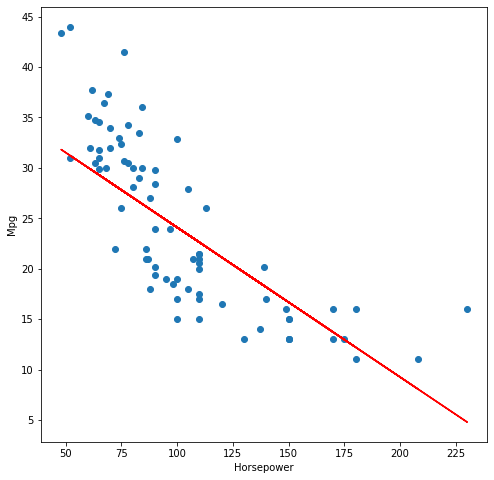

In [25]:
fig, ax = plt.subplots(figsize=(8, 8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Horsepower')
plt.ylabel('Mpg')
plt.show()

#plot x test vs. y test and plot the regression line to see if model can accurately predict where the data points are

#points are closer to line; data fits line much better; model is much better

#This was simple regression using a single feature 

In [26]:
automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.000000,8,307.0,130,3504,12.0,US,49
1,16.000000,8,304.0,150,3433,12.0,US,49
2,17.000000,8,302.0,140,3449,10.5,US,49
3,14.000000,8,454.0,220,4354,9.0,US,49
4,23.551429,8,440.0,215,4312,8.5,US,49


In [27]:
automobile_df = pd.get_dummies(automobile_df, columns=['Origin'])

automobile_df.head()

#We want to convert Origin column/categorical data column into numeric form in order to perform machine learning using several features
#We can do this by doing one-hot encoding 
#The pd.get_dummies function allows us to one-hot encode our origin column 

#One-hot encoding adds a column for each value of categorical data, so there is a column for Europe, Japan, and US origins
#Where there is a 1 present in the column, that means the car originated from there/it's a "checkmark" for that column

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age,Origin_Europe,Origin_Japan,Origin_US
0,18.000000,8,307.0,130,3504,12.0,49,0,0,1
1,16.000000,8,304.0,150,3433,12.0,49,0,0,1
2,17.000000,8,302.0,140,3449,10.5,49,0,0,1
3,14.000000,8,454.0,220,4354,9.0,49,0,0,1
4,23.551429,8,440.0,215,4312,8.5,49,0,0,1


In [28]:
X = automobile_df.drop('MPG', axis=1)
Y = automobile_df['MPG']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

print('Training score: ', linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)

print('Testing score: ', r2_score(y_test, y_pred))

#We are gonna drop the MPG column and try to teach our machine learning model how to generalize new data points using all this data
#We drop MPG because we are trying to predict MPG
#Multiple parts of data
#It performs very well!!! More data, better it performs, which also could mean the more relationships we know/connect about something, the more we have an idea of it

Training score:  0.8110458731130668
Testing score:  0.7640685482728942


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
